# Semantic and Syntactic Relationships

In [15]:
import numpy as np
from scipy import spatial
from tqdm import tqdm

from flyvec import FlyVec

import gensim

from transformers import BertModel, BertTokenizer
import torch

### FlyVec

In [3]:
flyvec_model = FlyVec.load()
flyvec = dict()
for word in flyvec_model.token_vocab:
    if flyvec_model.tokenizer.tokenize(word) != []:
        flyvec[word] = flyvec_model.get_sparse_embedding(word)['embedding']

### word2vec

In [4]:
# https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('models/GoogleNews-vectors-negative300.bin', binary = True) 
word2vec = dict()
for k in list(word2vec_model.key_to_index.keys())[:20000]:
    word2vec[k] = word2vec_model[k]

### GloVe

In [5]:
# https://nlp.stanford.edu/projects/glove/
# https://nlp.stanford.edu/data/glove.6B.zip

glove_model = open("./models/glove.6B.300d.txt", "r", encoding="utf-8")
glove = dict()
for i, line in enumerate(glove_model):
    if i == 20000:
        break
    tokens = line.split()
    word = tokens[0]
    vector = np.asarray(tokens[1:], "float32")
    glove[word] = vector

### BERT

In [ ]:
bert_base = "bert-base-uncased"
bert_base_tokenizer = BertTokenizer.from_pretrained(bert_base)
bert_base_model = BertModel.from_pretrained(bert_base)
bert = dict()
for token, id in bert_base_tokenizer.get_vocab().items():
    bert[token] = bert_base_model.get_input_embeddings()(torch.tensor(id)).detach().numpy() 

### Experiments

In [7]:
# taken from https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
def find_closest_embeddings(embedding_dict, embedding):
    return sorted(embedding_dict.keys(), key=lambda word: spatial.distance.euclidean(embedding_dict[word], embedding))

In [8]:
# king - man + woman = queen
print("FlyVec",find_closest_embeddings(flyvec, flyvec["king"] - flyvec["man"] + flyvec["woman"])[1:6])
print("word2vec",find_closest_embeddings(word2vec, word2vec["king"] - word2vec["man"] + word2vec["woman"])[1:6])
print("GloVe",find_closest_embeddings(glove, glove["king"] - glove["man"] + glove["woman"])[1:6])
print("BERT",find_closest_embeddings(bert, bert["king"] - bert["man"] + bert["woman"])[1:6])

FlyVec ['nephew', 'kings', 'grandson', 'king’s', 'princess']
word2vec ['queen', 'princess', 'prince', 'King', 'ruler']
GloVe ['queen', 'monarch', 'mother', 'princess', 'daughter']
BERT ['queen', 'woman', 'women', 'princess', 'female']


In [9]:
# actor - man + woman = actress
print("FlyVec",find_closest_embeddings(flyvec, flyvec["actor"] - flyvec["man"] + flyvec["woman"])[1:6])
print("word2vec",find_closest_embeddings(word2vec, word2vec["actor"] - word2vec["man"] + word2vec["woman"])[1:6])
print("GloVe",find_closest_embeddings(glove, glove["actor"] - glove["man"] + glove["woman"])[1:6])
print("BERT",find_closest_embeddings(bert, bert["actor"] - bert["man"] + bert["woman"])[1:6])

FlyVec ['actress', 'woman', 'woman”', 'potter', 'musician']
word2vec ['actress', 'actresses', 'actors', 'woman', 'singer']
GloVe ['actor', 'actresses', 'actors', 'starred', 'performer']
BERT ['actor', 'actors', 'actresses', 'comedian', 'activist']


In [10]:
# Paris - France + England = London
print("FlyVec",find_closest_embeddings(flyvec, flyvec["paris"] - flyvec["france"] + flyvec["england"])[1:6])
print("word2vec",find_closest_embeddings(word2vec, word2vec["Paris"] - word2vec["France"] + word2vec["England"])[1:6])
print("GloVe",find_closest_embeddings(glove, glove["paris"] - glove["france"] + glove["england"])[1:6])
print("BERT",find_closest_embeddings(bert, bert["paris"] - bert["france"] + bert["england"])[1:6])

FlyVec ['england', 'madrid', 'orlando', 'brisbane', 'munich']
word2vec ['London', 'Paris', 'Manchester', 'Oxford', 'Brighton']
GloVe ['london', 'birmingham', 'manchester', 'oxford', 'middlesex']
BERT ['paris', 'london', 'english', 'manchester', 'chicago']


In [11]:
# athlete - sport + art = artist
print("FlyVec",find_closest_embeddings(flyvec, flyvec["athlete"] - flyvec["sport"] + flyvec["art"])[1:6])
print("word2vec",find_closest_embeddings(word2vec, word2vec["athlete"] - word2vec["sport"] + word2vec["art"])[1:6])
print("GloVe",find_closest_embeddings(glove, glove["athlete"] - glove["sport"] + glove["art"])[1:6])
print("BERT",find_closest_embeddings(bert, bert["athlete"] - bert["sport"] + bert["art"])[1:6])

FlyVec ['athlete', 'award', 'writers', 'awardwinning', 'teacher']
word2vec ['artist', 'athlete', 'artwork', 'painter', 'musician']
GloVe ['artist', 'sculptor', 'painter', 'sculpture', 'artists']
BERT ['athlete', 'artist', 'artists', 'artwork', 'artworks']


In [12]:
# brother - boy + girl = sister
print("FlyVec",find_closest_embeddings(flyvec, flyvec["brother"] - flyvec["boy"] + flyvec["girl"])[1:6])
print("word2vec",find_closest_embeddings(word2vec, word2vec["brother"] - word2vec["boy"] + word2vec["girl"])[1:6])
print("GloVe",find_closest_embeddings(glove, glove["brother"] - glove["boy"] + glove["girl"])[1:6])
print("BERT",find_closest_embeddings(bert, bert["brother"] - bert["boy"] + bert["girl"])[1:6])

FlyVec ['sister', 'girl', 'girl”', 'boyfriend', 'niece']
word2vec ['sister', 'cousin', 'daughter', 'father', 'son']
GloVe ['sister', 'cousin', 'daughter', 'wife', 'father']
BERT ['sister', 'girl', 'daughter', 'mother', 'friend']


In [13]:
# newer - new + deep = deeper
print("FlyVec",find_closest_embeddings(flyvec, flyvec["newer"] - flyvec["new"] + flyvec["deep"])[1:6])
print("word2vec",find_closest_embeddings(word2vec, word2vec["newer"] - word2vec["new"] + word2vec["deep"])[1:6])
print("GloVe",find_closest_embeddings(glove, glove["newer"] - glove["new"] + glove["deep"])[1:6])
print("BERT",find_closest_embeddings(bert, bert["newer"] - bert["new"] + bert["deep"])[1:6])

FlyVec ['newer', 'liquid', 'steam', 'microwave', 'bulky']
word2vec ['deeper', 'newer', 'even', 'shallow', 'some']
GloVe ['deeper', 'newer', 'shallow', 'whereas', 'rooted']
BERT ['deeper', 'newer', 'deepest', 'deeply', 'shallow']


In [14]:
# unacceptable - acceptable + aware = unaware
print("FlyVec",find_closest_embeddings(flyvec, flyvec["unacceptable"] - flyvec["acceptable"] + flyvec["aware"])[1:6])
print("word2vec",find_closest_embeddings(word2vec, word2vec["unacceptable"] - word2vec["acceptable"] + word2vec["aware"])[1:6])
print("GloVe",find_closest_embeddings(glove, glove["unacceptable"] - glove["acceptable"] + glove["aware"])[1:6])
print("BERT",find_closest_embeddings(bert, bert["unacceptable"] - bert["acceptable"] + bert["aware"])[1:6])

FlyVec ['unacceptable', 'apologise', 'unaware', 'warnings', 'concerned']
word2vec ['unaware', 'unacceptable', 'mindful', 'concerned', 'reminded']
GloVe ['unaware', 'concerned', 'obviously', 'unacceptable', 'fact']
BERT ['unaware', 'unacceptable', 'realize', 'realizing', '[unused795]']


### Experiments on Semantic and Syntactic Relationships Dataset

In [2]:
# https://code.google.com/archive/p/word2vec/source/default/source
# https://github.com/nicholas-leonard/word2vec/blob/master/questions-words.txt

analogy_dataset = open("./word2vec/questions-words.txt", "r")
analogies = []
for i, line in enumerate(analogy_dataset):
    if line[0] != ":":
        analogies.append(line.split())

In [14]:
'''
Takes a token (word) as input and returns the embedding from the given model.
'''
def get_embedding_from_model(model, token):
    try:
        return model[token]
    except KeyError:
        try:
            # retry with a lowercase version of the token if it was not present in the voabulary
            return model[token.lower()]
        except KeyError:
            return []


In [15]:
# adjusted from https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

'''
Given a list of three token, this function constructs the word analogy (a - b + c) and 
returns a sorted list of the closest words in the embddings space of the given model.
'''
def find_closest_embeddings(embedding_dict, words):
    one = get_embedding_from_model(embedding_dict, words[0])
    two = get_embedding_from_model(embedding_dict, words[1])
    three = get_embedding_from_model(embedding_dict, words[2])
    if len(one) > 0 and len(two) > 0 and len(three) > 0:
        embedding = one - two + three
        return sorted(embedding_dict.keys(), key=lambda word: spatial.distance.euclidean(embedding_dict[word], embedding))
    else:
        return []

In [16]:
'''
Calculate the accuracy of a model on the semantic and syntactic relationships dataset.
The accuracy is simply the ratio of relationships that were predicated correctly (count)
to the amount of relationships for which each word was in the model vocabulary (total).
'''
def calculate_word_analogy_accuracy(model, k=5):
    count = 0
    total = 0
    closest_embeddings_dict = dict()
    for analogy in tqdm(analogies):
        closest_embeddings = find_closest_embeddings(model, analogy[:3])[1:k+1]
        if len(closest_embeddings) > 0:
            total += 1
            if analogy[3] in closest_embeddings:
                count += 1
        closest_embeddings_dict[";".join(analogy[:3])] = closest_embeddings
    return len(analogies), count, total, closest_embeddings_dict

In [17]:
analogies_word2vec, count_word2vec, total_word2vec, closest_embeddings_dict_word2vec = calculate_word_analogy_accuracy(word2vec)

100%|██████████| 19544/19544 [19:35<00:00, 16.63it/s] 


In [18]:
analogies_flyvec, count_flyvec, total_flyvec, closest_embeddings_dict_flyvec = calculate_word_analogy_accuracy(flyvec)

100%|██████████| 19544/19544 [24:25<00:00, 13.33it/s] 


In [19]:
analogies_glove, count_glove, total_glove, closest_embeddings_dict_glove = calculate_word_analogy_accuracy(glove)

100%|██████████| 19544/19544 [21:33<00:00, 15.11it/s] 


In [20]:
analogies_bert, count_bert, total_bert, closest_embeddings_dict_bert = calculate_word_analogy_accuracy(bert)

100%|██████████| 19544/19544 [38:57<00:00,  8.36it/s] 


In [21]:
flyvec_accuracy = count_flyvec / total_flyvec
word2vec_accuracy = count_word2vec / total_word2vec
glove_accuracy = count_glove / total_glove
bert_accuracy = count_bert / total_bert

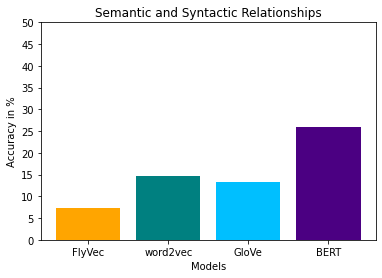

In [22]:
from matplotlib import pyplot as plt

plt.bar([1,2,3,4],[flyvec_accuracy*100,word2vec_accuracy*100,glove_accuracy*100,bert_accuracy*100], color=['Orange','Teal','DeepSkyBlue','Indigo'])
plt.yticks(np.linspace(0,50,11))
plt.xticks([1,2,3,4],['FlyVec','word2vec','GloVe','BERT'])
plt.xlabel("Models")
plt.ylabel("Accuracy in %")
plt.title("Semantic and Syntactic Relationships")
#plt.savefig("analogies.png", dpi=300)
plt.show()